# Исследование данных HR-агентства

HR-агентство изучает тренды на рынке труда в IT. 

Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

# Задачи:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist;
2. Ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?;
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?;
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?;
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?


## 1. Загрузка и обработка данных:

### 1.1 Импорт библиотек:

In [1]:
# для работы с таблицами и данными
import pandas as pd
# для работы с массивами и числовыми данными
import numpy as np
# для визуализации данных и построения графиков
import seaborn as sns
# для создания графиков
import matplotlib.pyplot as plt
# для выполнения статистических тестов
import scipy.stats as stats
# для построения графика qqplot
import statsmodels.api as sm
import plotly
import plotly.express as px

### 1.2 Знакомство с датасетом:

In [2]:
# Загрузка данных из CSV-файла в DataFrame
data = pd.read_csv('data/ds_salaries.csv', index_col=0)
# Вывод количества строк и столбцов
print(f'DataSet состоит из {data.shape[0]} записей и {data.shape[1]} признаков.')

DataSet состоит из 607 записей и 11 признаков.


In [3]:
# Получение общей информации о DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [4]:
# Проверяем DataSet на наличие дублирующихся записей
count_of_dublicated = data.duplicated().sum()
# Выводим количество найденных дубликатов, которые можно рекомендовать к удалению
print(f'Количество дублирующихся записей в DataSet, рекомендуемых к удалению: {count_of_dublicated}.')

Количество дублирующихся записей в DataSet, рекомендуемых к удалению: 42.


In [5]:
# Удаляем дублирующиеся строки из датасета
data = data.drop_duplicates()
# Вывод количества строк и столбцов
print(f'Очищенный DataSet состоит из {data.shape[0]} записей и {data.shape[1]} признаков.')

Очищенный DataSet состоит из 565 записей и 11 признаков.


**Промежуточные выводы:**
- В данных **отсутствуют пропуски**;
- Все **типы данных** соответствуют содержимому в ячейках:
    - **числовые данные** - тип `int64`;
    - **категориальные признаки** - тип `object`;
- DataSet состоит из **607 записей** и **11 признаков**, включая **42 дублирующиеся** записи;
- По результатам **удаления дубликатов** DataSet представлен **565 записями** и **11 признаками** уникальными признаками.


## 2. Разведывательный анализ данных:

### 2.1 Визуализация числового признака **salary**, поиск выбросов:

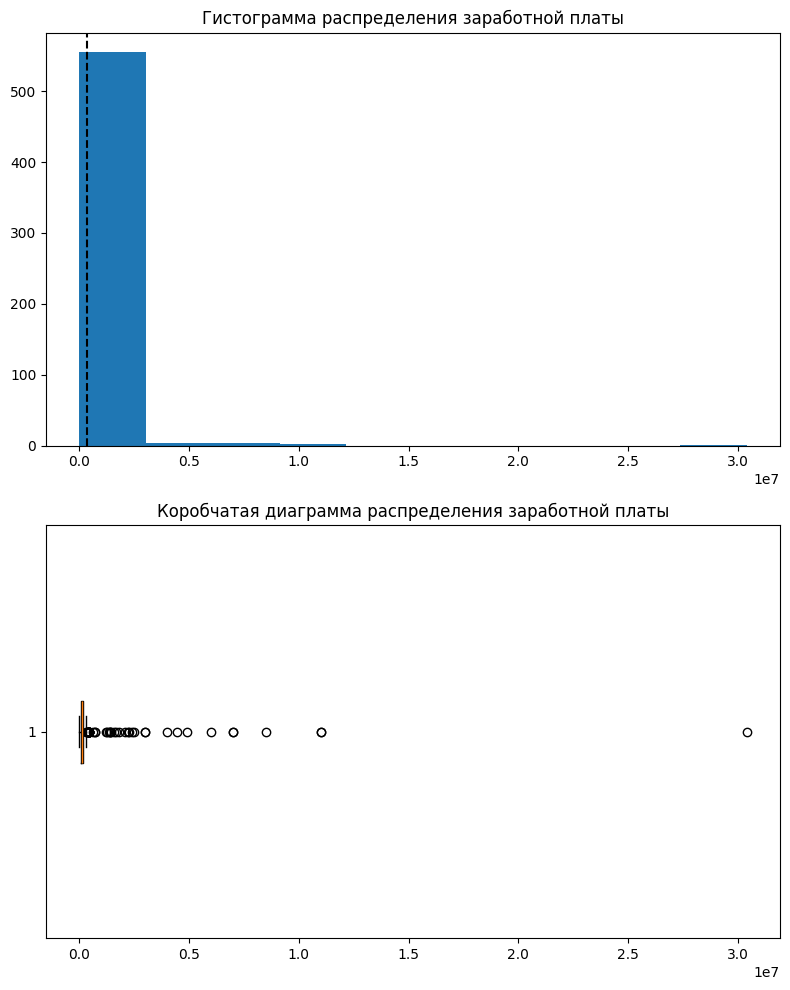

In [6]:
# Создаем фигуру с 1 строкой и 2 столбцами подграфиков
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

# Первый подграфик: гистограмма распределения заработной платы
hist = axes[0].hist(data['salary'], bins=10)
axes[0].set_title('Гистограмма распределения заработной платы')
axes[0].axvline(data['salary'].mean(), color='black', linestyle='--')

# Второй подграфик: коробчатая диаграмма (boxplot) для анализа выбросов
boxplot = axes[1].boxplot(data['salary'], vert=False)
axes[1].set_title('Коробчатая диаграмма распределения заработной платы')

plt.tight_layout()
plt.show()

In [7]:
data['salary'].describe()

count    5.650000e+02
mean     3.381160e+05
std      1.599879e+06
min      4.000000e+03
25%      6.700000e+04
50%      1.109250e+05
75%      1.650000e+05
max      3.040000e+07
Name: salary, dtype: float64

**Промежуточные выводы**:

Максимальное значение: **30 400 000** — это **очень высокое значение**, которое значительно превышает другие данные (например, 75-й процентиль, который равен 165 000): 
- Это может указывать на **наличие выбросов**.

In [8]:
# Сортируем DataFrame по размеру заработной платы, от большей к меньшей
sorted_data = data.sort_values(by='salary', ascending=False)
filtered_data = sorted_data[sorted_data['salary'] > 200000]
filtered_data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
102,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
137,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
285,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
136,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
384,2022,EX,FT,Head of Machine Learning,6000000,INR,79039,IN,50,IN,L
263,2021,SE,FT,Machine Learning Engineer,4900000,INR,66265,IN,0,IN,L
16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
198,2021,SE,FT,Data Science Manager,4000000,INR,54094,IN,50,US,L


**Промежуточные выводы о выбросах:**

- На основе представленных данных можно заметить, что **заработные платы** существенно различаются из-за **использования разных валют**;
- Например, зарплата в CLP (чилийское песо) и HUF (венгерский форинт) значительно отличается от заработных плат в более крупных валютах, таких как USD;
- Это объясняет **высокие значения зарплат**, которые могут **выглядеть как выбросы**.

Таким образом, пока эти значения **не следует считать выбросами**.

Для дальнейшего анализа следует **искать выбросы** в заработной плате, конвентированной в USD - **salary_in_usd**.

**Промежуточные выводы о графиках**:
- График `гистограммы распределения переменной salary` **не** напоминает **колокол** и не является **нормальным распределением**. Для более точной оценки необходимы дополнительные исследования;
- На `коробчатой диаграмме распределения salary` сложно определить **медиану** и **межквартильный разброс** из-за большого количества **потенциальных выбросов**.

Для дальнейшего анализа следует провести **тест на нормальность**, **логарифмирование признака**, поиск выбросов на признаке **salary_in_usd**, чтобы подтвердить или опровергнуть **гипотезу о нормальном распределении данных**. 

### 2.2 Визуализация числового признака **salary_in_usd**, поиск **выбросов**:

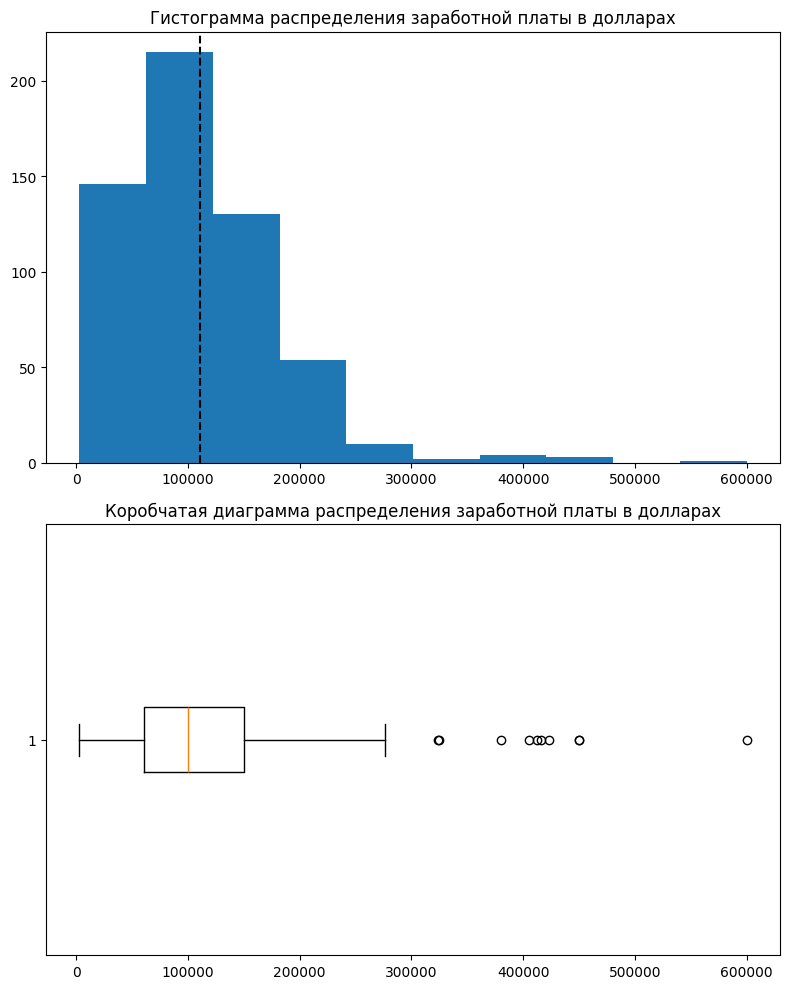

In [9]:
# Создаем фигуру с 1 строкой и 2 столбцами подграфиков
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

# Первый подграфик: гистограмма распределения заработной платы в USD
hist = axes[0].hist(data['salary_in_usd'], bins=10)
axes[0].set_title('Гистограмма распределения заработной платы в долларах')
axes[0].axvline(data['salary_in_usd'].mean(), color='black', linestyle='--')

# Второй подграфик: коробчатая диаграмма (boxplot) для анализа выбросов
boxplot = axes[1].boxplot(data['salary_in_usd'], vert=False)
axes[1].set_title('Коробчатая диаграмма распределения заработной платы в долларах')

plt.tight_layout()
plt.show()

**Промежуточные выводы о графиках**:
- График `гистограммы распределения заработной платы в долларах` напоминает **колокол**, но с очень большим хвостом. Сложно сказать, что он отражае **нормальное распределение**. Для более точной оценки необходимы дополнительные исследования;
- На `коробчатой диаграмме распределения заработной платы в долларах` можем определить **медиану** заработной платы в USD в районе 100 тыс. долларов, **межквартильный размах** от 0 - 280 тыс. долларов, а также наличие **потенциальных выбросов**.

Для дальнейшего анализа следует провести **поиск и удаление выбросов**, **тест на нормальность**, **логарифмирование признака**, чтобы подтвердить или опровергнуть **гипотезу о нормальном распределении данных**. 

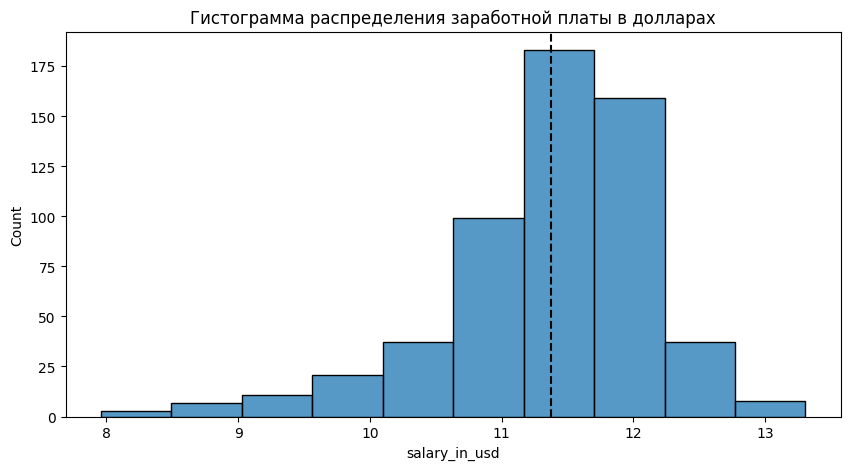

In [10]:
# Логарифмирование зарплаты в долларах, чтобы уменьшить влияние выбросов и привести распределение к виду нормального
fig = plt.figure(figsize=(10,5))

# Гистограмма распределения заработной платы в долларах
hist = sns.histplot(np.log(data['salary_in_usd']), bins=10)
hist.set_title('Гистограмма распределения заработной платы в долларах')
hist.axvline(np.log(data['salary_in_usd']).mean(), color='black', linestyle='--')

plt.show()

**Промежуточные выводы**:
- График `гистограммы распределения заработной платы в долларах` уже больше напоминает **колокол** и **нормальное распределение**. 
- Для более точной оценки необходимо провести **тест на нормальное распределение**.

### 2.3 Основные статистические характеристики: для числовых признаков (**salary_in_usd**):

In [11]:
data['salary_in_usd'].describe()

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [12]:
# Сортируем DataFrame по размеру заработной платы в долларах, от большей к меньшей
sorted_data = data.sort_values(by='salary_in_usd', ascending=False)
filtered_data = sorted_data[sorted_data['salary_in_usd'] > 250000]
filtered_data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
519,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M


**Выводы по выбросам**:

- На основании анализа данных можно отметить, что зарплаты, **превышающие $250 000 в год**, могут выглядеть как выбросы;
- Однако, **изучив рынок труда США**, становится очевидным, что такие зарплаты **соответствуют реалиям для высококвалифицированных специалистов на высоких должностях**, таких как Principal Data Engineer, Applied Machine Learning Scientist или Director of Data Science;
- Учитывая **здравый смысл** и некоторое **понимание специфики рынка США**, данные значения **не буду считать выбросами**, и они **не будут удалены из анализа**;
- Заработные платы **меньше $10 000** также **не будут удалены**, т.к. **salary_in_usd** - общая выплаченная валовая сумма заработной платы и может быть выплачена сотрудникам, которые **не работаю целый год**.

### 2.4 Определение в данных **неинформативных признаков**:

На основании **проведенного анализа** можно сделать вывод, что в столбце **salary_in_usd** уже содержится унифицированная информация **о зарплатах**. 

Именно поэтому столбцы **salary** и **salary_currency** можно считать **избыточными**.

Удаление этих столбцов сделает датасет более **компактным** и **удобным** для анализа, **не потеряв** при этом полезной информации.

- Итоговый DataSet будет состоять из **9 признаков**:
    - **числовой:** salary_in_usd;
    - **категориальные:** experience_level, employment_type, job_title, employee_residence, company_location, company_size, work_year (тип int, но признак категориальный), remote_ratio (тип int, но признак категориальный).

In [13]:
# Удаляем столбцы salary и salary_currency
data = data.drop(['salary', 'salary_currency'], axis=1)
# Вывод количества столбцов
print(f'Итоговый DataSet состоит из {data.shape[1]} признаков')

Итоговый DataSet состоит из 9 признаков


### 2.5 Основные статистические характеристики для **категориальных признаков**:

In [14]:
data.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,50,57,50,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


Из **основых характеристик** для **категориальных признаков** типа object можно выявить следующее:
|**Признак**         |**Наиболее частое значение**|**Частота наиболее частого значения**|
|-----------------|------------------------|---------------------------------|
|experience_level |SE (Senior-level/Expert)|243 / 565                        |
|employment_type  |FT (Full-time)          |546 / 565                        |
|job_title        |Data Scientist          |130 / 565                        |
|employee_residence|US|295 / 565|
|company_location|US|318 / 565|
|company_size|M (средняя компания)|290 / 565|

- **Опыт**: Большинство сотрудников — Senior-level (243);
- **Тип занятости**: Преобладает полный рабочий день (546);
- **Должности**: Чаще всего — Data Scientist (130);
- **Проживание**: Сотрудники в основном из США (295);
- **Локация компаний**: Большинство компаний в США (318).


### 2.6 Основные статистические характеристики для **числовых признаков**:

In [15]:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


Из **основых характеристик** для **числовых признаков** можно выявить следующее:

1. **work_year (Год)^:**
- Диапазон: с 2020 по 2022;
- Основной год: 2021 (медиана);
2. **salary_in_usd (Зарплата в долларах):**
- Средняя зарплата: 110 610 USD;
- Медианная зарплата: 100 000 USD;
- Максимальная зарплата: 600 000 USD;
- Минимальная зарплата: 2859;
3. **remote_ratio (Доля удаленной работы)^:**
- Среднее значение: ~70% (преобладает удаленка);
- Медиана: 100% (полностью удаленная работа).

^ - тип числовой, но в анализе будем считать категориальным!

## 3. Разведывательный анализ данных:


### 3.1 Визуальный анализ данных:

#### 3.1.1 Визуализация влияния **года** (work_year) на **заработную плату** Data Scientist (salary_in_usd):

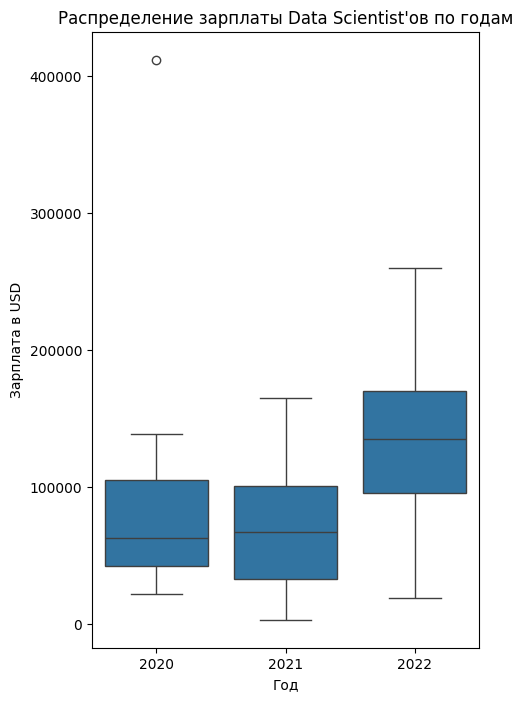

In [16]:
# Фильтруем данные: выбираем только вакансии с должностью "Data Scientist"
data_of_DS = data[data['job_title'] == 'Data Scientist']

# Строим boxplot, чтобы увидеть распределение зарплат Data Scientist по годам
fig, axes = plt.subplots(figsize=(5,8))
# boxplot для анализа влияния года на зарплату
sns.boxplot(data=data_of_DS, x='work_year', y='salary_in_usd', ax=axes)

# Добавляем заголовок и подписи осей
axes.set_title("Распределение зарплаты Data Scientist'ов по годам")
axes.set_xlabel('Год')
axes.set_ylabel('Зарплата в USD')

plt.show()

**Промежуточный вывод**:

По графику распределения **зарплат** Data Scientist'ов в зависимости от **года (2020-2022)** можем сделать следующие выводы:
- **Медианная зарплата увеличивается**, что подтверждает заинтересованность компаний в данных специалистах. Особенно заметен скачок с **~65 000$ в 2021** году до **~135 000 в 2022** году;
- **Разброс зарплат** также **расширяется**. В 2022 году наблюдается значительное увеличение диапазона зарплат.

#### 3.1.2 Визуализация влияния **опыта работы** (experience_level) **на заработную плату** (salary_in_usd):

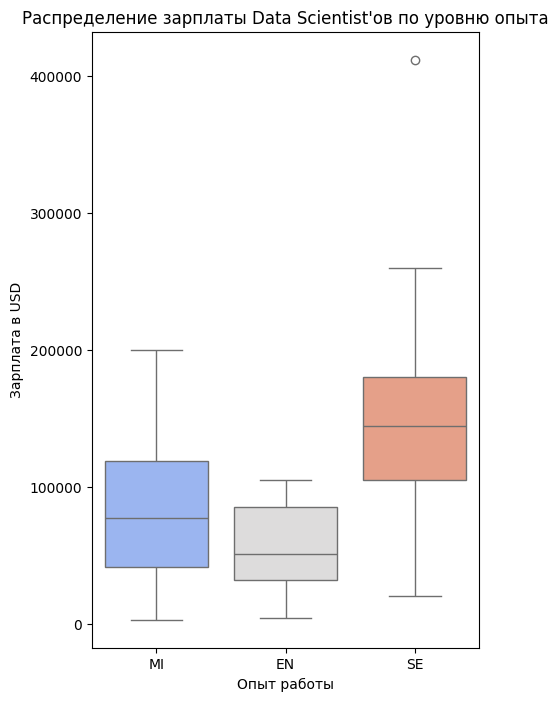

In [17]:
# boxplot, чтобы увидеть распределение зарплат Data Scientist по уровню профессионального опыта
fig, axes = plt.subplots(figsize=(5,8))
sns.boxplot(data=data_of_DS, x='experience_level', y='salary_in_usd', ax=axes, hue='experience_level', palette="coolwarm")

# Добавляем заголовок и подписи осей
axes.set_title("Распределение зарплаты Data Scientist'ов по уровню опыта")
axes.set_xlabel('Опыт работы')
axes.set_ylabel('Зарплата в USD')

plt.show()

**Промежуточные выводы:**

По графику распределения **зарплат** Data Scientist'ов в зависимости от **опыта** можем сделать следующие выводы:
- **Медианная зарплата увеличивается** в зависимости от роста уровня опыта, что является неоспоримым фактом;
- **Разброс зарплат** также **расширяется** в зависимости от роста уровня опыта;
- Медианная заработная плата:
    - **Entry-level/Junior**: в районе **50 000 USD**;
    - **Mid-level/Intermediate**: в районе **80 000 USD**;
    - **Senior-level/Expert**: в районе **150 000 USD**;
    - Заработные платы категории **Executive-level/Director** **не представлены** в выборке.

#### 3.1.3 Визуализация влияния **типа трудоустройства** (employment_type) **на заработную плату** (salary_in_usd):

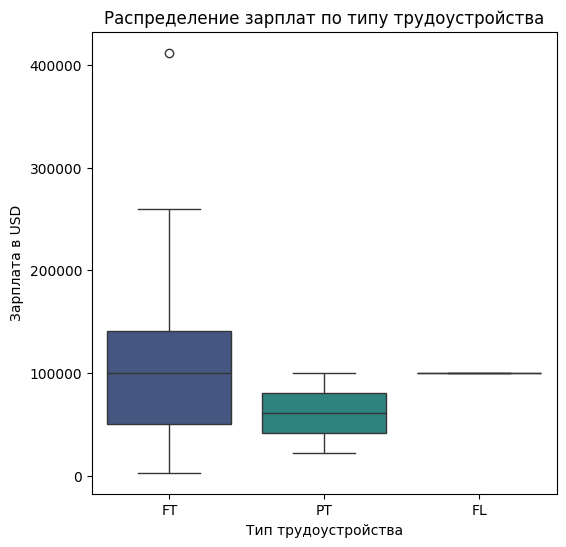

In [18]:
plt.figure(figsize=(6, 6))  
# boxplot, который показывает распределение зарплат по типу трудоустройства  
sns.boxplot(data=data_of_DS, x='employment_type', y='salary_in_usd', hue='employment_type', palette='viridis')  

# Добавляем заголовок и подписи осей
plt.title('Распределение зарплат по типу трудоустройства')  
plt.xlabel('Тип трудоустройства')  # Подпись оси X (employment_type)  
plt.ylabel('Зарплата в USD')  # Подпись оси Y (salary_in_usd)  

plt.show()  

In [19]:
data_of_DS['employment_type'].value_counts()

employment_type
FT    127
PT      2
FL      1
Name: count, dtype: int64

**Промежуточные выводы**:

По графику распределения **зарплат** Data Scientist'ов в зависимости от **типа трудоустройства** можем сделать следующие выводы:
1. **Полная занятость (FT)** — самый распространенный тип трудоустройства (127 случаев):
   - **Медианная зарплата** составляет примерно **100 000 USD**;
   - **Разброс зарплат** значительный: от **50 000 до 130 000 USD**, но встречаются аномальные значения выше **400 000 USD**;

2. **Частичная занятость (PT) и фриланс (FL)** — выборка слишком мала (2 и 1 случай соответственно): 
   - Из-за малого количества данных **нельзя сделать объективные выводы**.

#### 3.1.4 Визуализация влияния **страны проживания** (employee_residence) **на заработную плату** (salary_in_usd):

In [20]:
# Группируем данные по странам и считаем медианную зарплату
median_salary_by_country = round(data_of_DS.groupby('employee_residence')['salary_in_usd'].median()).reset_index()
# Cписок с трехбуквенными кодами стран - конвертация в полные названия
median_salary_by_country["employee_residence"] = median_salary_by_country["employee_residence"].replace({
    "AT": "Austria",
    "AU": "Australia",
    "BR": "Brazil",
    "CA": "Canada",
    "CH": "Switzerland",
    "CL": "Chile",
    "DE": "Germany",
    "DZ": "Algeria",
    "ES": "Spain",
    "FR": "France",
    "GB": "United Kingdom",
    "GR": "Greece",
    "HU": "Hungary",
    "IN": "India",
    "IT": "Italy",
    "JP": "Japan",
    "MX": "Mexico",
    "NG": "Nigeria",
    "PH": "Philippines",
    "PL": "Poland",
    "RS": "Serbia",
    "RU": "Russia",
    "SG": "Singapore",
    "TR": "Turkey",
    "UA": "Ukraine",
    "US": "United States",
    "VN": "Vietnam"
})
count_of_DS_emp = median_salary_by_country["employee_residence"].count()
print(f'Сотрудники Data Scientist в выборке проживают в {count_of_DS_emp} странах.')

Сотрудники Data Scientist в выборке проживают в 27 странах.


In [21]:
# Строим график
fig = px.choropleth(
    data_frame=median_salary_by_country, #DataFrame
    locations="employee_residence", #столбец с локациями
    locationmode = "country names",
    color="salary_in_usd",
    range_color=[median_salary_by_country["salary_in_usd"].min(), median_salary_by_country["salary_in_usd"].max()], #диапазон цвета
    title='Распределение медианной заработной платы сотрудников по странам проживания', #заголовок
    width=1600, #ширина
    height=1000, #высота
    color_continuous_scale='Magma'  # Палитра цветов
)

# Отображаем график
fig.show()

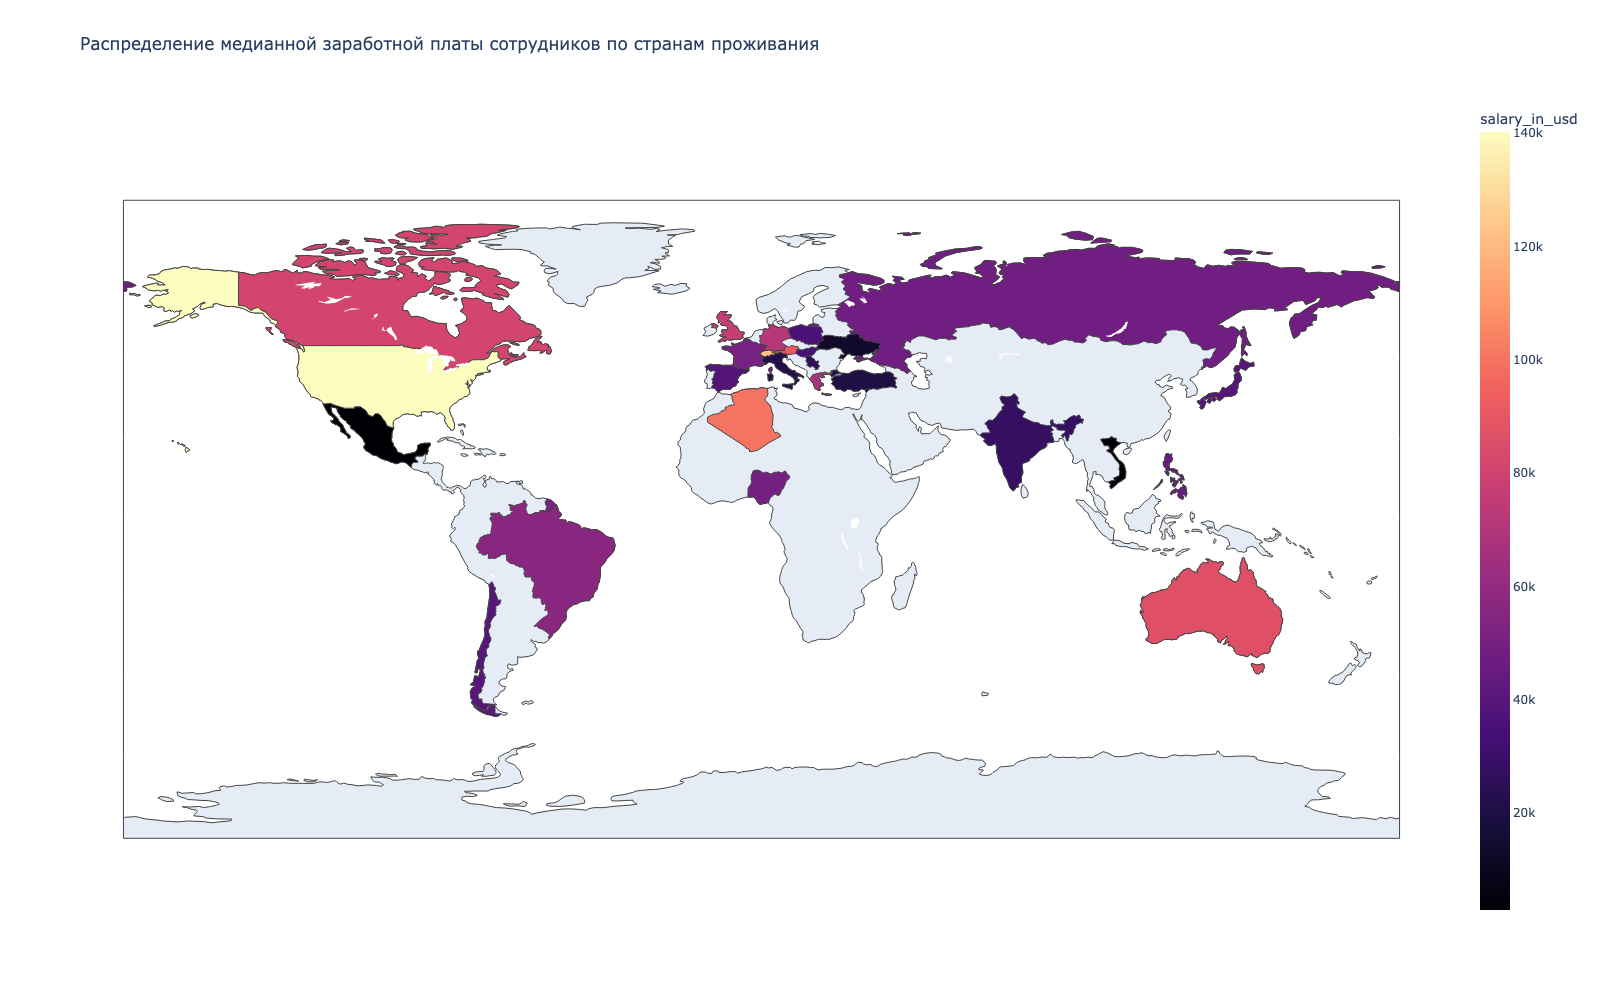
**Промежуточные выводы**:

Анализируя карту мира распределения **медианной заработной платы** сотрудников (Data Scientist'ов) по **странам проживания** можно сделать следующие выводы:
- Сотрудники Data Scientist в выборке проживают в **27 странах**;
- **Наибольшая заработная плата** наблюдается у сотрудников, проживающих в **США и Швейцарии** (более **122 000 долларов**);
- **Средний диапазон заработной платы** характерен для сотрудников, проживающих в **Канаде, Бразилии, Великобритании, Германии, Греции, Австралии, Австрии, Алгерии** (от **55 - 100 000 долларов**);
- **Нижний диапазон заработной платы** наблюдается у сотрудников, проживающих в **России, Чили, Венгрии, Нигерии, Японии, Филипинах, Испании, Франции, Польше, Сербии, Индии** (от **25 - 55 000 долларов**);
- **Наименьшая заработная плата** зафиксирована у сотруднков, проживающих в **Мексике, Вьетнаме, Украине, Турции и Италии** (менее **25 000 долларов**);
- Интересно, что сотрудники в выборке, проживающие **в Российской федерации**, работают в компаниях, чьи **головные офисы расположены за пределами России** (информация будет ниже на мировой карте).

#### 3.1.5 Визуализация влияния **страны головного офиса работодателя** (company_location) **на заработную плату** (salary_in_usd):

In [22]:
# Группируем данные по странам и считаем медианную зарплату
median_salary_by_company_location = round(data_of_DS.groupby('company_location')['salary_in_usd'].median()).reset_index()
# Список с трехбуквенными кодами стран для конвертации в полные названия
median_salary_by_company_location['company_location'] = median_salary_by_company_location['company_location'].replace({
    "AT": "Austria",
    "AU": "Australia",
    "BR": "Brazil",
    "CA": "Canada",
    "CH": "Switzerland",
    "CL": "Chile",
    "DE": "Germany",
    "DZ": "Algeria",
    "ES": "Spain",
    "FR": "France",
    "GB": "United Kingdom",
    "HU": "Hungary",
    "IL": "Israel",
    "IN": "India",
    "IT": "Italy",
    "LU": "Luxembourg",
    "MX": "Mexico",
    "MY": "Malaysia",
    "NG": "Nigeria",
    "PL": "Poland",
    "TR": "Turkey",
    "UA": "Ukraine",
    "US": "United States",
    "VN": "Vietnam"
})
count_of_DS_country = median_salary_by_company_location["company_location"].count()
print(f'Сотрудники Data Scientist в выборке работают в {count_of_DS_country} странах.')

Сотрудники Data Scientist в выборке работают в 24 странах.


In [23]:
# Строим график
fig = px.choropleth(
    data_frame=median_salary_by_company_location, #DataFrame
    locations="company_location", #столбец с локациями
    locationmode = "country names",
    color="salary_in_usd",
    range_color=[median_salary_by_company_location["salary_in_usd"].min(), median_salary_by_company_location["salary_in_usd"].max()], #диапазон цвета
    title='Распределение медианной заработной платы сотрудников по странам расположения главного офиса работодателя', #заголовок
    width=1600, #ширина
    height=1000, #высота
    color_continuous_scale='Magma'  # Палитра цветов
)

# Отображаем график
fig.show()

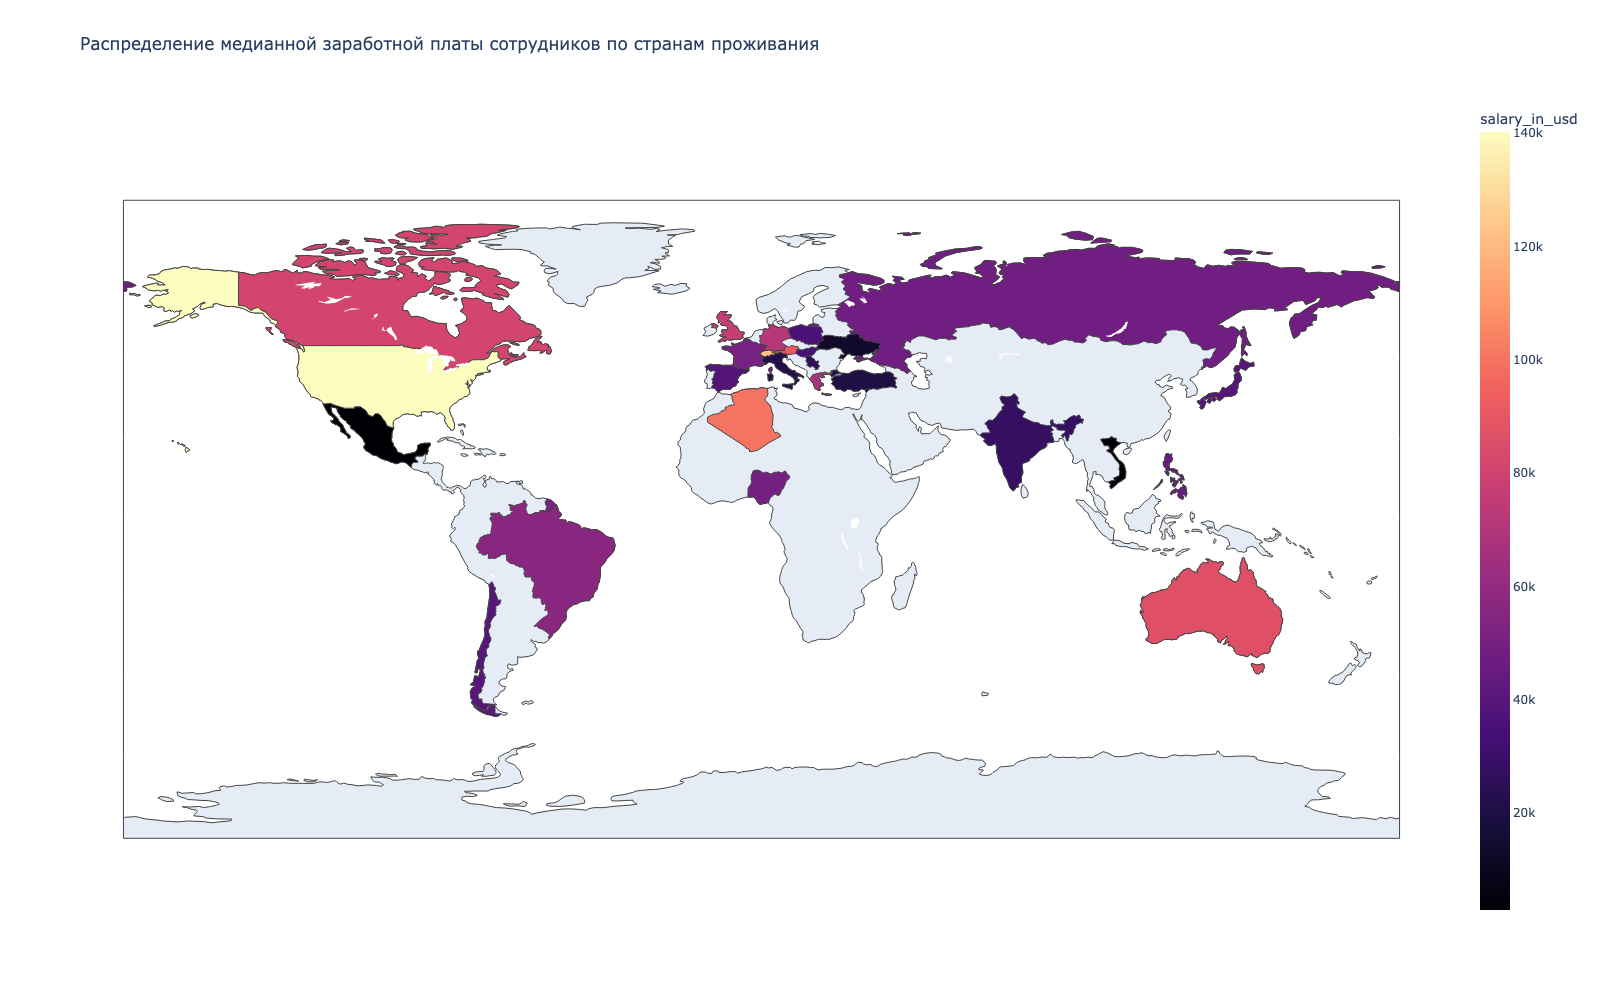
**Промежуточные выводы**:

Анализируя карту мира распределения **медианной заработной платы** сотрудников (Data Scientist'ов) по **странам расположения главного офиса работодателя** можно сделать следующие выводы:
- Сотрудники Data Scientist в выборке работают в **24 странах**, а **проживают в 27**;
- **Наибольшая заработная плата** наблюдается у сотрудников, проживающих в **США и Швейцарии** (более **122 000 долларов**);
- **Средний диапазон заработной платы** характерен для сотрудников, проживающих в **Израиле, Алгерии, Австралии, Великобритании, Австрии, Канаде, Германии, Люксембурге** (от **55 - 100 000 долларов**);
- **Нижний диапазон заработной платы** наблюдается у сотрудников, проживающих в **Нигерии, Франции, Чили, Малазии, Испании, Венгрии, Польше, Индии** (от **25 - 55 000 долларов**);
- **Наименьшая заработная плата** зафиксирована у сотруднков, проживающих в **Италии, Турции, Украине, Бразилии, Вьетнаме, Мексике** (менее **25 000 долларов**).

**Закономерности в распределении зарплат Data Scientist'ов**:

- **Сотрудники проживают в 27 странах, а компании расположены в 24 странах**. Это означает, что часть Data Scientist'ов работает **удалённо** на компании, расположенные в других странах; 
- Например, **в России проживают сотрудники, но компании там не зарегистрированы**, что подтверждает тренд на удалённую работу в иностранных компаниях;
- **США и Швейцария** уверенно лидируют по зарплатам (более **122 000 долларов**);
- Зарплаты от **55 000 до 100 000 долларов** характерны для **Европы, Канады, Австралии и Израиля**;
- **Самые низкие зарплаты в странах с низкой стоимостью жизни** - **Мексика, Вьетнам, Украина, Турция, Италия, Бразилия** – **менее 25 000 долларов**.  

#### 3.1.6 **Круговая диаграмма** процентного распределения **стран по категориям зарплат**:

In [24]:
# Ранжируем заработные платы по странам путем создания нового признака
def func_classification(salary: int) -> str:
    if salary > 122000:
        return "более 122 000 долларов"
    elif salary in range(55000, 122000):
        return "от 55 - 100 000 долларов"
    elif salary in range(25000, 55000):
        return "от 25 - 55 000 долларов"
    else:
        return "менее 25 000 долларов"

# Применяем функцию func_classification
median_salary_by_company_location["salary_category"] = median_salary_by_company_location['salary_in_usd'].apply(func_classification)

In [25]:
median_salary_by_company_location.sort_values(by='salary_in_usd')

,company_location,salary_in_usd,salary_category
16,Mexico,2859.0,менее 25 000 долларов
23,Vietnam,4000.0,менее 25 000 долларов
2,Brazil,12901.0,менее 25 000 долларов
21,Ukraine,13400.0,менее 25 000 долларов
20,Turkey,20171.0,менее 25 000 долларов
14,Italy,21669.0,менее 25 000 долларов
13,India,29075.0,от 25 - 55 000 долларов
19,Poland,35590.0,от 25 - 55 000 долларов
11,Hungary,35735.0,от 25 - 55 000 долларов
8,Spain,38776.0,от 25 - 55 000 долларов


In [26]:
# Строим круговую диаграмму
fig = px.pie(
    median_salary_by_company_location, 
    names="salary_category", 
    title="Круговая диаграмма процентного распределения стран по категориям зарплат",
    hole=0.4 
)
fig.show()

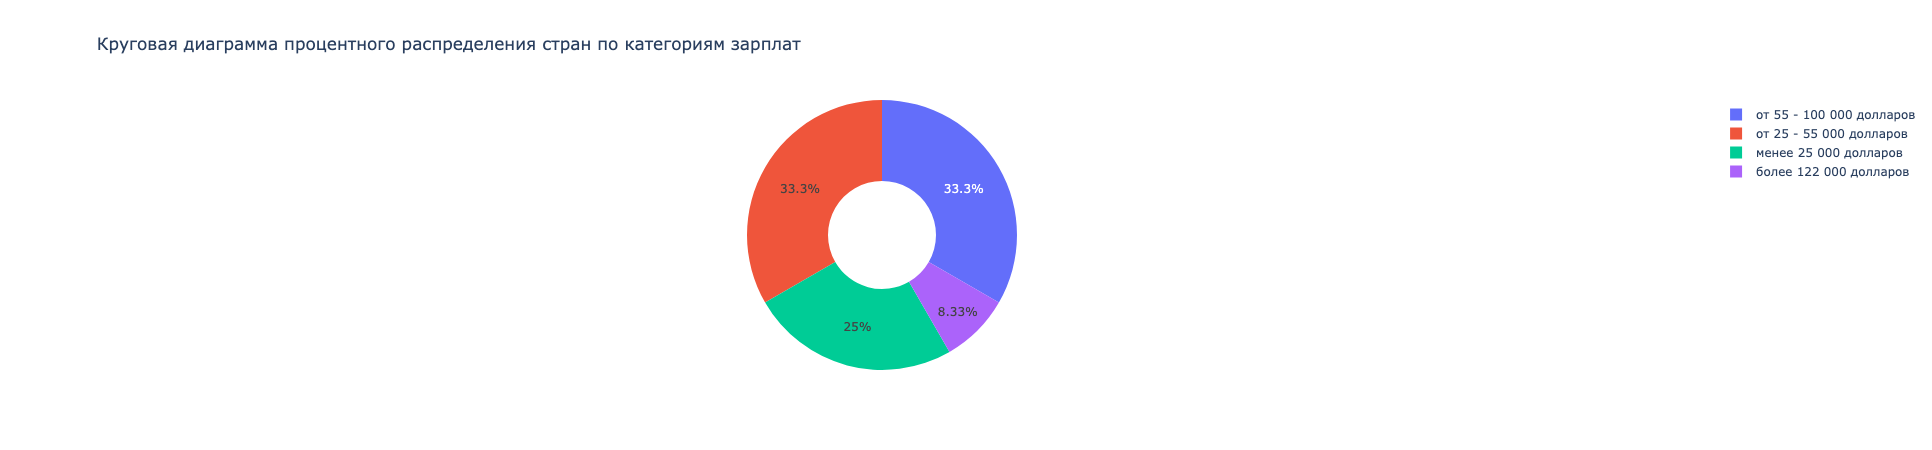

**Выводы** из диаграммы процентного распределения стран по категориям зарплат **(по местоположению главного офиса компании)**:

1. **Большинство** стран **(66.6%: 33.3% и 33.3% соответственно)** относятся к категории зарплат **от 25 000 до 100 000 долларов**;
2. **25%** стран находятся в категории **менее 25 000 долларов**;
3. Лишь **8.33%** стран попадают в **самую высокую категорию (более 122 000 долларов)**:
- В эту категорию попадают **США и Швейцария**, где расположены крупнейшие технологические гиганты; 
- Высокая стоимость жизни и развитый рынок IT делают эти страны лидерами по уровню зарплат.  

#### 3.1.7 Визуализация влияния **формата работы** (remote_ratio) **на заработную плату** (salary_in_usd)

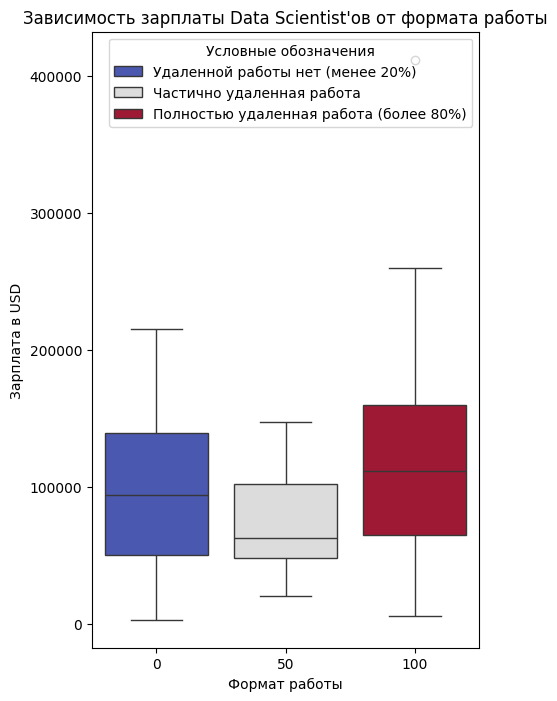

In [27]:
# Строим boxplot, чтобы увидеть распределение зарплат Data Scientist от формата работы
fig, axes = plt.subplots(figsize=(5,8))
sns.boxplot(data=data_of_DS, x='remote_ratio', y='salary_in_usd', ax=axes, hue='remote_ratio', palette="coolwarm")

# Добавляем заголовок и подписи осей
axes.set_title("Зависимость зарплаты Data Scientist'ов от формата работы")
axes.set_xlabel('Формат работы')
axes.set_ylabel('Зарплата в USD')

# Добавляем условные обозначения
legend = {
    0: "Удаленной работы нет (менее 20%)",
    50: "Частично удаленная работа",
    100: "Полностью удаленная работа (более 80%)"
}
# Получение легенды из текущего графика
handles, _ = axes.get_legend_handles_labels()
# Обновление легенды, заменяя числа на текстовые описания
axes.legend(handles, [legend[label] for label in legend.keys()], title="Условные обозначения")

plt.show()

**Промежуточные выводы:**

По графику распределения **зарплат** Data Scientist'ов в зависимости от **формата работы** можем сделать следующие выводы:
1. **Медианная зарплата**:
    - у сотрудников, работающих **полностью удаленно** - **наибольшая**: около 110 000 долларов;
    - у сотрудников, **предпочитающих частично удаленный формат** - **наименьшая**: около 60 000 долларов;

2. **Разброс зарплат** у сотрудников, работающих **полностью в удаленном формате** - **наибольший**.

#### 3.1.8 Визуализация влияния **размера компании** (company_size) **на заработную плату** (salary_in_usd):

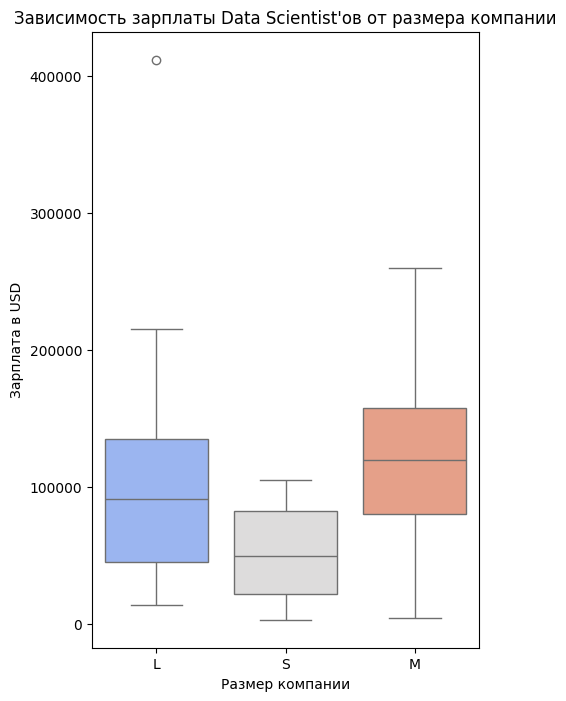

In [28]:
# Строим boxplot, чтобы увидеть распределение зарплат Data Scientist от размера компании
fig, axes = plt.subplots(figsize=(5,8))
sns.boxplot(data=data_of_DS, x='company_size', y='salary_in_usd', ax=axes, hue='company_size', palette="coolwarm")

# Добавляем заголовок и подписи осей
axes.set_title("Зависимость зарплаты Data Scientist'ов от размера компании")
axes.set_xlabel('Размер компании')
axes.set_ylabel('Зарплата в USD')

plt.show()

**Легенда:**

**S** — менее 50 сотрудников (**небольшая компания**);

**M** — от 50 до 250 сотрудников (**средняя компания**);

**L** — более 250 сотрудников (**крупная компания**).

**Промежуточные выводы:**

**Выводы** из анализа зависимости **зарплат** Data Scientist'ов от **размера компании**:

1. **Средние компании (M — от 50 до 250 сотрудников) предлагают самые высокие зарплаты**:
   - **Медианная зарплата выше**, чем в крупных и небольших компаниях; 
   - **Разброс зарплат** больше всех;

2. **Крупные компании (L — более 250 сотрудников) предлагают сбалансированные зарплаты**: 
   - **Медианная зарплата выше**, чем у малых компаний, но ниже, чем у средних; 
   - **Разброс** меньше чем у средних, но больше чем у небольших компаний;  

3. **Малые компании (S — менее 50 сотрудников) предлагают самые низкие зарплаты**:
   - **Медиана заметно ниже**, чем в средних и крупных компаниях; 
   - **Разброс зарплат небольшой**, слегка превышает **100 000 долларов**.

## **Общий вывод** на тему: какие факторы влияют на зарплату специалиста Data Scientist?

**Зарплата Data Scientist'а** зависит от **множества факторов,** среди которых ключевыми являются **опыт работы**, **страна проживания**, **местоположение компании**, **формат работы** и **размер компании**:

- В целом, **зарплаты растут** с годами, особенно заметен скачок в 2022 году;
- Опыт напрямую влияет на доход: **Junior-специалисты получают около 50 000 USD, а Senior-специалисты – 150 000 USD и выше**;
- Наиболее высокооплачиваемые позиции находятся в **США и Швейцарии**, где медианная зарплата превышает **122 000 USD**;
- Также важную роль играет формат работы: **удаленные сотрудники в среднем получают больше, чем офисные**;
- Среди компаний наибольшие зарплаты предлагают **средние, затем крупные, а малые компании платят меньше всего**.  

Портрет **самого богатого Data Scientist'а:**
- **Работать в США или Швейцарии** (либо в компании с головным офисом в этих странах);  
- **Иметь высокий уровень опыта (Senior/Expert)**;  
- **Работать в средних по размеру компаниях (50–250 сотрудников)**;  
- **Выбирать полный удаленный формат работы**.  

## 4. Статистический анализ данных:

**Ключевые вопросы HR-агентства:**
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?;
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?;
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?;
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

### 4.1 Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

#### 1. Формирование **гипотез**:

`Нулевая гипотеза` - ежегодный рост медианной аработной платы у специалистов Data Scientist не наблюдается;

`Альтернативная гипотеза` - ежегодный рост медианной аработной платы у специалистов Data Scientist наблюдается.

#### 2. Анализ **распределения зарплат**:

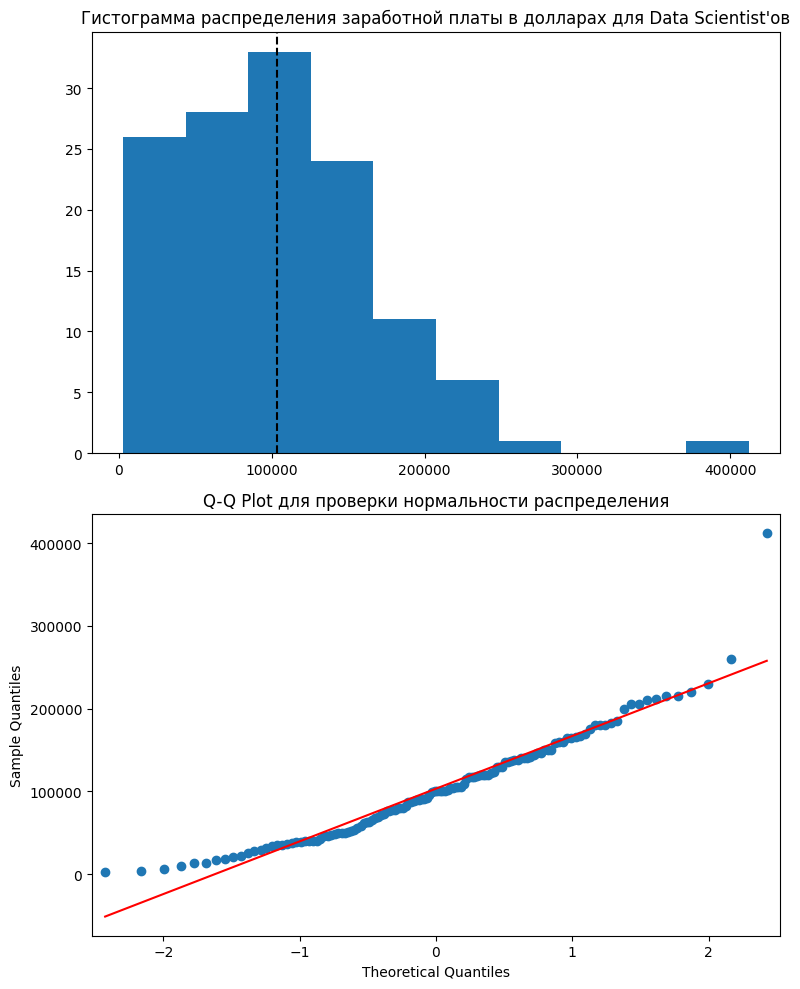

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

# Первый подграфик: гистограмма распределения заработной платы
hist = axes[0].hist(data_of_DS['salary_in_usd'], bins=10)
axes[0].set_title("Гистограмма распределения заработной платы в долларах для Data Scientist'ов")
axes[0].axvline(data_of_DS['salary_in_usd'].mean(), color='black', linestyle='--')

# Второй подграфик: Q-Q Plot для проверки распеределения на нормальность
sm.qqplot(data_of_DS['salary_in_usd'], line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot для проверки нормальности распределения')

plt.tight_layout()
plt.show()

**Промежуточные выводы:**

- График `гистограммы распределения заработной платы в долларах для Data Scientist'ов` **не** напоминает **колокол** и не является **нормальным распределением**. Для более точной оценки необходимы дополнительные исследования;
- На графике `Q-Q Plot` точки **отклоняются от прямой**, что свидетельствует о том, что распределение **не является нормальным**;

Для дальнейшего анализа следует провести **тест на нормальность**, **логарифмирование** salary_in_usd, чтобы подтвердить или опровергнуть **гипотезу о нормальном распределении данных**. 

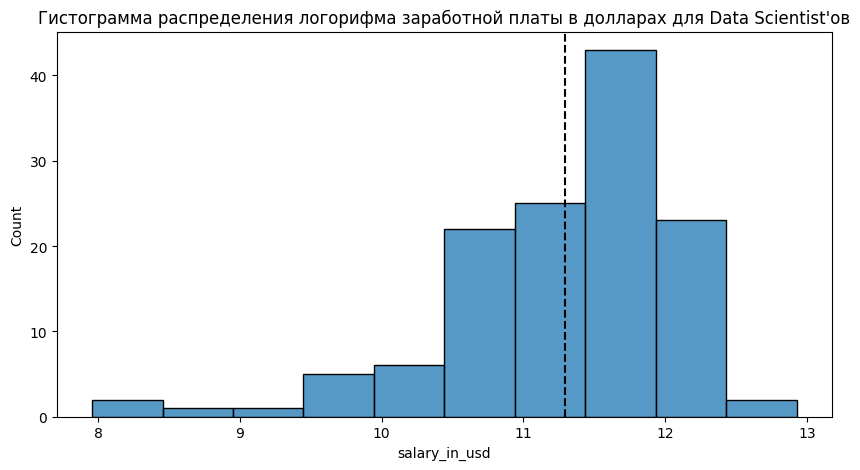

In [30]:
# Логарифмирование зарплаты в долларах, чтобы привести распределение к виду нормального
fig = plt.figure(figsize=(10,5))

# Гистограмма распределения заработной платы в долларах
hist = sns.histplot(np.log(data_of_DS['salary_in_usd']), bins=10)
hist.set_title("Гистограмма распределения логорифма заработной платы в долларах для Data Scientist'ов")
hist.axvline(np.log(data_of_DS['salary_in_usd']).mean(), color='black', linestyle='--')

plt.show()


**Промежуточные выводы:**

- График `гистограммы распределения логорифма заработной платы в долларах для Data Scientist'ов` уже больше напоминает **колокол** и **нормальное распределение**;
- Для более точной оценки необходимо провести **тест на нормальное распределение**.

Необходимо провести **тест на нормальность**, чтобы подтвердить или опровергнуть **гипотезу о нормальном распределении данных**. 

#### 3. Проверка на **нормальность** (salary_in_usd):
Тест **Шапиро-Уилка**:
1. `Нулевая гипотеза` - данные распределены **нормально**;
2. `Альтернативная гипотеза` — данные **не распределены нормально**;
3. **Уровень значимости** alpha = **0.05**.

In [31]:
#Функция для проверки распределения на нормальность
def normal_distribution(p_value, alpha=0.05):
    """
    Проверяет распределение данных на нормальность на основе значения p-value.
    - p_value (float): Значение p-value из теста на нормальность.
    - alpha (float): Уровень значимости (по умолчанию 0.05).
    """
    if p_value <= alpha:
        print(f'Значение p-value={p_value:.2f} меньше или равно уровня значимости alpha={alpha}.')
        print('Отклоняем нулевую гипотезу в пользу альтернативной.')
        print('Распределение данных не является нормальным.')
    else:
        print('Значение p-value={p_value:.2f} больше уровня значимости alpha={alpha}.')
        print('Нет оснований отклонять нулевую гипотезу.')
        print('Распределение данных нормальное.')

In [32]:
# Проверяем распределение зарплаты в долларах США
# Проведение теста Шапиро-Уилка на нормальность
_, p_value = stats.shapiro(data_of_DS['salary_in_usd'])
# Интерпретация результата с использованием функции
normal_distribution(p_value)

Значение p-value=0.00 меньше или равно уровня значимости alpha=0.05.
Отклоняем нулевую гипотезу в пользу альтернативной.
Распределение данных не является нормальным.


**Выводы по тесту на нормальное распределение**:

- На основании проведенного теста можно сделать вывод, что **признак salary_in_usd** (зарплата в долларах США) **не распределен нормально**; 
- Для дальнейшего **статистического анализа** будут использоваться **непараметрические тесты**, так как они более устойчивы к отклонениям от нормальности распределения данных.


#### 4. Выбор **статистического теста**:
1. **Тип признака** - **количественный** (зарплата в долларах);
2. **Количество сравниваемых групп** - **3 года (2020, 2021, 2022)**;
3. **Группы независимы** - Каждая зарплата относится к разным годам;
4. **Распределение зарплат не является нормальным** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста** - Краскела-Уоллиса (непараметрический тест для 3х групп) + тест Манна-Уитни (для пар групп).

In [33]:
#Функция для интерпретации результатов тестов
def result_stat_test(p_value, alpha=0.05):
    if p_value <= alpha:
        print(f'p-значение {p_value:.3f} меньше, чем заданный уровень значимости {alpha}.')
        print(f'Отвергаем нулевую гипотезу в пользу альтернативной.')
    else:
        print(f'p-значение {p_value:.3f} больше, чем заданный уровень значимости {alpha}.') 
        print(f'У нас нет оснований отвергнуть нулевую гипотезу.')

In [34]:
# Загружаем данные для трёх групп
salary_2020_DS = list(data_of_DS[data_of_DS['work_year'] == 2020]['salary_in_usd'])
salary_2021_DS = list(data_of_DS[data_of_DS['work_year'] == 2021]['salary_in_usd'])
salary_2022_DS = list(data_of_DS[data_of_DS['work_year'] == 2022]['salary_in_usd'])

# Проводим тест Краскела-Уоллиса
_, p = stats.kruskal(salary_2020_DS, salary_2021_DS, salary_2022_DS)
print(f'p-value = {p:.3f}')
result_stat_test(p)

p-value = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Отвергаем нулевую гипотезу в пользу альтернативной.


In [35]:
# Вывод медианных значений по годам
print(f"Медианная зарплата в 2020 году: {np.median(salary_2020_DS):.2f}")
print(f"Медианная зарплата в 2021 году: {np.median(salary_2021_DS):.2f}")
print(f"Медианная зарплата в 2022 году: {np.median(salary_2022_DS):.2f}")

Медианная зарплата в 2020 году: 62726.00
Медианная зарплата в 2021 году: 67233.50
Медианная зарплата в 2022 году: 135000.00


#### 5. Проведем **дополнительный тест Манна-Уитни** для подтверждения результатов:

In [36]:
# Тест Манна-Уитни для 2020 и 2021 годов
_, p_2020_2021 = stats.mannwhitneyu(salary_2020_DS, salary_2021_DS)
print(f"p-value для сравнения медиан 2020 и 2021: {p_2020_2021:.3f}")
result_stat_test(p_2020_2021)
print()

# Тест Манна-Уитни для 2021 и 2022 годов
_, p_2021_2022 = stats.mannwhitneyu(salary_2021_DS, salary_2022_DS)
print(f"p-value для сравнения медиан 2021 и 2022: {p_2021_2022:.3f}")
result_stat_test(p_2021_2022)

p-value для сравнения медиан 2020 и 2021: 0.599
p-значение 0.599 больше, чем заданный уровень значимости 0.05.
У нас нет оснований отвергнуть нулевую гипотезу.

p-value для сравнения медиан 2021 и 2022: 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Отвергаем нулевую гипотезу в пользу альтернативной.


#### 6. **Вывод** по тесту:

1. **Нет статистически значимых различий** в распределении зарплат **между 2020 и 2021 годами**, медианные значения этих двух лет статистически схожи (это можно наблюдать даже в выводе медианных значений по годам);

2. **Есть статистически значимые различия** между зарплатами в **2021 и 2022 годах**. Медиана зарплаты в 2022 году существенно отличается от медианы зарплаты в 2021 году.

Итог: **статистически значимый рост заработной платы у специалистов Data Scientist наблюдается в 2022 году**.



### 4.2 Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

#### 1. Формирование **гипотез**:

`Нулевая гипотеза` - Медианные зарплаты Data Scientist и Data Engineer одинаковы в 2022 году;

`Альтернативная гипотеза` - Медианная зарплата Data Scientist больше, чем у Data Engineer в 2022 году.

#### 2. Выбор **статистического теста**:
1. **Тип признака** - **количественный** (зарплата в долларах);
2. **Количество сравниваемых групп** - **2 (Data Scientist, Data Engineer)**;
3. **Группы независимы** - Каждая зарплата относится к разным категориям;
4. **Распределение зарплат не является нормальным** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста** - тест Манна-Уитни (для пар независимых групп).

In [37]:
# Загружаем данные для 2х групп
salary_2022_DS = list(data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2022)]['salary_in_usd'])
salary_2022_DE = list(data[(data['job_title'] == 'Data Engineer') & (data['work_year'] == 2022)]['salary_in_usd'])

# Тест Манна-Уитни
_, p = stats.mannwhitneyu(salary_2022_DS, salary_2022_DE, alternative='greater') # 'greater' т.к. гипотеза H1: DS > DE
print(f'p-value = {p:.3f}')
result_stat_test(p)

p-value = 0.160
p-значение 0.160 больше, чем заданный уровень значимости 0.05.
У нас нет оснований отвергнуть нулевую гипотезу.


#### 3. **Вывод** по тесту:

1. **Нет статистически значимых доказательств** того, что медианные зарплаты Data Scientist выше, чем у Data Engineer в 2022 году;

2. На основании теста **нет оснований утверждать**, что **медианные зарплаты Data Scientist и Data Engineer в 2022 году значительно различаются**.


### 4.3 Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

#### 1. Формирование **гипотез**:

`Нулевая гипотеза` - Зарплаты специалистов Data Scientist в компаниях различных размеров равны;

`Альтернативная гипотеза` - Зарплаты специалистов Data Scientist в компаниях различных размеров различаются.

#### 2. Выбор **статистического теста**:
1. **Тип признака** - **количественный** (зарплата в долларах);
2. **Количество сравниваемых групп** - **3 (S, M, L)**;
3. **Группы независимы** - Каждая зарплата относится к компаниям разных;
4. **Распределение зарплат не является нормальным** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста** - Краскела-Уоллиса (непараметрический тест для 3х групп).

In [38]:
# Загружаем данные для трёх групп
salary_DS_S = list(data_of_DS[data_of_DS['company_size'] == 'S']['salary_in_usd'])
salary_DS_M = list(data_of_DS[data_of_DS['company_size'] == 'M']['salary_in_usd'])
salary_DS_L = list(data_of_DS[data_of_DS['company_size'] == 'L']['salary_in_usd'])

# Проводим тест Краскела-Уоллиса
_, p = stats.kruskal(salary_DS_S, salary_DS_M, salary_DS_L)
print(f'p-value = {p:.3f}')
result_stat_test(p)

p-value = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Отвергаем нулевую гипотезу в пользу альтернативной.


#### 3. **Вывод** по тесту:

1. **Есть статистически значимые различия в зарплатах** специалистов Data Scientist в компаниях разного размера (S, M, L);

2. Нулевая гипотеза отвергнута: **зарплаты не являются одинаковыми для компаний разных размеров**.


#### 4.4 Вывод Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

#### 1. Формирование **гипотез**:

`Нулевая гипотеза` - Наличие должностей Data Scientist и Data Engineer и размером компании независимы;

`Альтернативная гипотеза` - Наличие должностей Data Scientist и Data Engineer и размером компании взаимосвязаны.

#### 2. Выбор **статистического теста**:
1. **Тип признака** - **категориальные**;
2. **Признаки независимы**;
3. **Выбор теста** - Критерий хи-квадрат.

In [39]:
# Оставляем только Data Scientist и Data Engineer
df_filtered = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

# Создаем таблицу сопряженности
table_crosstab = pd.crosstab(df_filtered['job_title'], df_filtered['company_size'])

# Проводим хи-квадрат тест
_, p, _, _ = stats.chi2_contingency(table_crosstab)
print(f'p-value = {p:.3f}')
result_stat_test(p)

p-value = 0.005
p-значение 0.005 меньше, чем заданный уровень значимости 0.05.
Отвергаем нулевую гипотезу в пользу альтернативной.


#### 3. **Вывод** по тесту:

1. **Есть статистически значимая связь между должностью** (Data Scientist / Data Engineer) и **размером компании** (S, M, L);

2. Нулевая гипотеза отвергнута - **Распределение профессий не является случайным по размеру компаний**. Определенные должности чаще встречаются в компаниях определенного размера


## 5.Дополнительное исследование:

### 5.1 Дополнительная гипотеза: Зарплата специалистов Data Scientist зависит от их уровня опыта. Чем выше уровень опыта, тем выше зарплата.

#### 1. Формирование **гипотез**:

`Нулевая гипотеза` - Зарплата специалистов Data Scientist не зависит от уровня опыта;

`Альтернативная гипотеза` - Зарплата специалистов Data Scientist зависит от уровня опыта.

#### 2. Выбор **статистического теста**:
1. **Тип признака** - **количественный** (зарплата в долларах);
2. **Количество сравниваемых групп** - **3 (Junior, Mid, Senior)**;
3. **Группы независимы** - Каждая зарплата относится к разным уровням опыта;
4. **Распределение зарплат не является нормальным** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста** - Краскела-Уоллиса (непараметрический тест для трех групп).

In [40]:
# Загружаем данные для трёх групп
junior_salary = list(data_of_DS[data_of_DS['experience_level'] == 'EN']['salary_in_usd'])
mid_salary = list(data_of_DS[data_of_DS['experience_level'] == 'MI']['salary_in_usd'])
senior_salary = list(data_of_DS[data_of_DS['experience_level'] == 'SE']['salary_in_usd'])

# Проводим тест Краскела-Уоллиса
_, p = stats.kruskal(junior_salary, mid_salary, senior_salary)
print(f'p-value = {p:.3f}')
result_stat_test(p)

p-value = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Отвергаем нулевую гипотезу в пользу альтернативной.


#### 3. **Вывод** по тесту:

1. **Зарплата специалистов Data Scientist зависит от уровня опыта (Junior, Mid, Senior)**;

2. **Нулевая гипотеза отклонена** — существует статистически значимая разница в зарплатах между уровнями опыта. 

### 5.2 Дополнительная гипотеза: Зарплата специалистов Data Scientist, работающих удаленно, отличается от зарплаты специалистов, работающих в офисе.

#### 1. Формирование **гипотез**:

`Нулевая гипотеза` - Зарплата специалистов Data Scientist, работающих удаленно, не отличается от зарплаты специалистов, работающих в офисе;

`Альтернативная гипотеза` - Зарплата специалистов Data Scientist, работающих удаленно, отличается от зарплаты специалистов, работающих в офисе.

#### 2. Выбор **статистического теста**:
1. **Тип признака** - **количественный** (зарплата в долларах);
2. **Количество сравниваемых групп** - **2 (Удаленная работа, Работа в офисе)**;
3. **Группы независимы** - Каждая зарплата относится к разным типам работы;
4. **Распределение зарплат не является нормальным** (подтверждено тестом Шапиро-Уилка);
5. **Выбор теста** - U-критерий Манна-Уитни (непараметрический тест для двух независимых групп).

In [41]:
# Загружаем данные для двух групп
remote_salary = list(data_of_DS[data_of_DS['remote_ratio'] == 100]['salary_in_usd'])
office_salary = list(data_of_DS[data_of_DS['remote_ratio'] == 0]['salary_in_usd'])

# Проводим тест Манна-Уитни
_, p_value = stats.mannwhitneyu(remote_salary, office_salary)
print(f'p-value = {p:.3f}')
result_stat_test(p)

p-value = 0.000
p-значение 0.000 меньше, чем заданный уровень значимости 0.05.
Отвергаем нулевую гипотезу в пользу альтернативной.


#### 3. **Вывод** по тесту:

1. **Зарплата специалистов Data Scientist, работающих удаленно, отличается от зарплаты специалистов, работающих в офисе**;

2. **Нулевая гипотеза отвергнута** - существует статистически значимая разница в зарплатах между двумя группами.

# Финальные выводы исследования:

**1. Динамика зарплат по годам:**
- **Рост медианных зарплат (2020–2022):**  
  Визуальный анализ выявил резкий скачок медианной зарплаты с ~65 000$ в 2021 до ~135 000$ в 2022. Это подтверждено **U-тестом Манна-Уитни**, показавшим статистически значимые различия между 2021 и 2022 годами; 

**2. Влияние профессионального опыта:**  
- **Прямая зависимость зарплаты от уровня опыта:**  
  Графики показали рост медианы от 50 000$ (Junior) до 150 000$ (Senior). **Тест Краскела-Уоллиса** подтвердил статистически значимые различия между группами;

**3. Географические факторы и тип графика работы:**  
- **Лидеры по зарплатам:**  
  США и Швейцария (медиана >122 000$), что связано с концентрацией технологических компаний и высокой стоимостью жизни;
- **Формат работы:**  
  Полная удалёнка ассоциирована с более высокой медианной зарплатой (~110 000$), что подтверждено **U-тестом** и визуализацией;

**4. Влияние размера компании:**  
- **Средние компании (50–250 сотрудников) лидируют по оплате:**  
  Медиана зарплат здесь выше, чем в крупных и малых компаниях. **Тест Краскела-Уоллиса** указал на статистически значимую связь между должностью и размером компании;

- **Связь должности и размера компании:**  
  **Хи-квадрат тест** показал, что распределение Data Scientist и Data Engineer по компаниям разного размера неслучайно;

**5. Статистические особенности данных:**  
- **Ненормальное распределение зарплат:**  
  Гистограммы и Q-Q plot показали асимметрию и хвосты. **Тест Шапиро-Уилка** отверг нормальность, что обосновало выбор непараметрических методов; 

**6. Рекомендации для максимизации дохода:**  
Оптимальный профиль высокооплачиваемого Data Scientist'a:  
- **Опыт:** Senior/Expert уровень;
- **География:** Работа в компаниях США/Швейцарии;  
- **Компания:** Средний размер (50–250 сотрудников);  
- **Формат:** Полная удалённая занятость.  

Исследование подтвердило, что зарплаты Data Scientist формируются под влиянием многих факторов, таких как **опыт работы**, **страна проживания**, **местоположение компании**, **формат работы** и **размер компании**, что подтверждено визуализациями и статистическими тестами.